<a href="https://colab.research.google.com/github/srivishnu2805/Machine_Learning-23249-/blob/main/Decision_Tree/DecesionTree_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

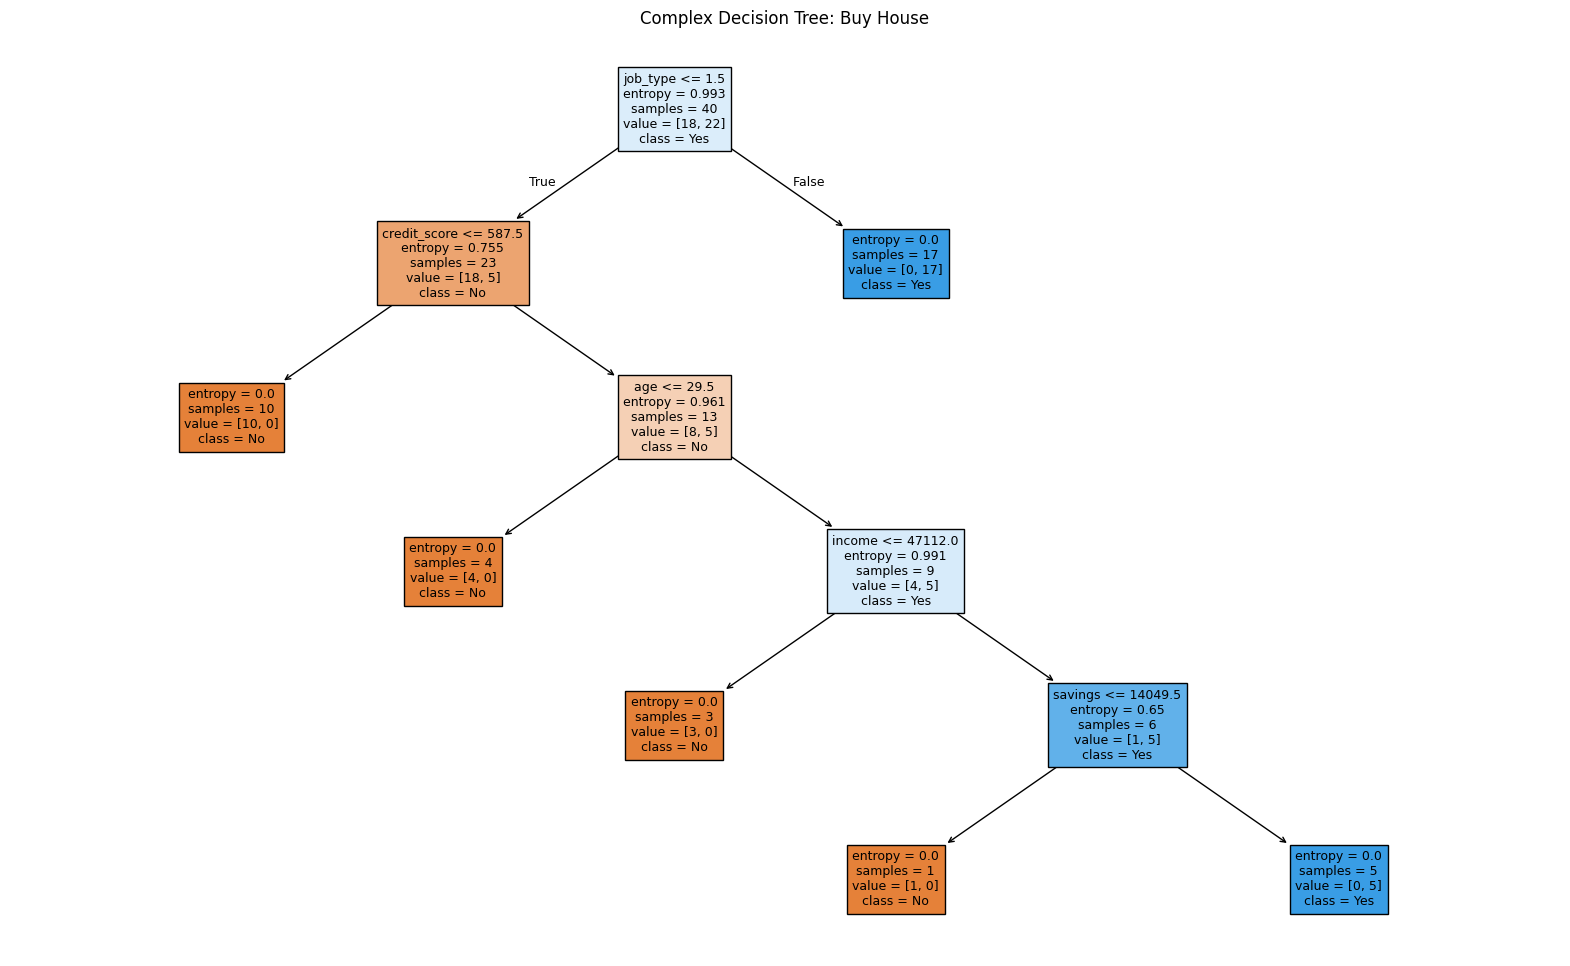

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(42)

n = 40
data_q1 = {
    "age": np.random.randint(20, 60, n),
    "income": np.random.randint(20000, 120000, n),
    "savings": np.random.randint(0, 80000, n),
    "credit_score": np.random.randint(300, 850, n),
    "job_type": np.random.choice(["intern", "contract", "permanent", "self_employed"], n),
}

data_q1["buy_house"] = [
    1 if (a > 30 and inc > 40000 and sav > 10000 and cs > 600) or jt in ["permanent", "self_employed"]
    else 0
    for a, inc, sav, cs, jt in zip(data_q1["age"], data_q1["income"], data_q1["savings"], data_q1["credit_score"], data_q1["job_type"])
]

df_q1 = pd.DataFrame(data_q1)

df_q1["job_type_encoded"] = df_q1["job_type"].map({
    "intern":0, "contract":1, "permanent":2, "self_employed":3
})

X_q1 = df_q1[["age", "income", "savings", "credit_score", "job_type_encoded"]]
y_q1 = df_q1["buy_house"]

clf_q1 = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
clf_q1.fit(X_q1, y_q1)

plt.figure(figsize=(20,12))
plot_tree(clf_q1, feature_names=["age", "income", "savings", "credit_score", "job_type"],
          class_names=["No", "Yes"], filled=True, fontsize=9)
plt.title("Complex Decision Tree: Buy House")
plt.show()

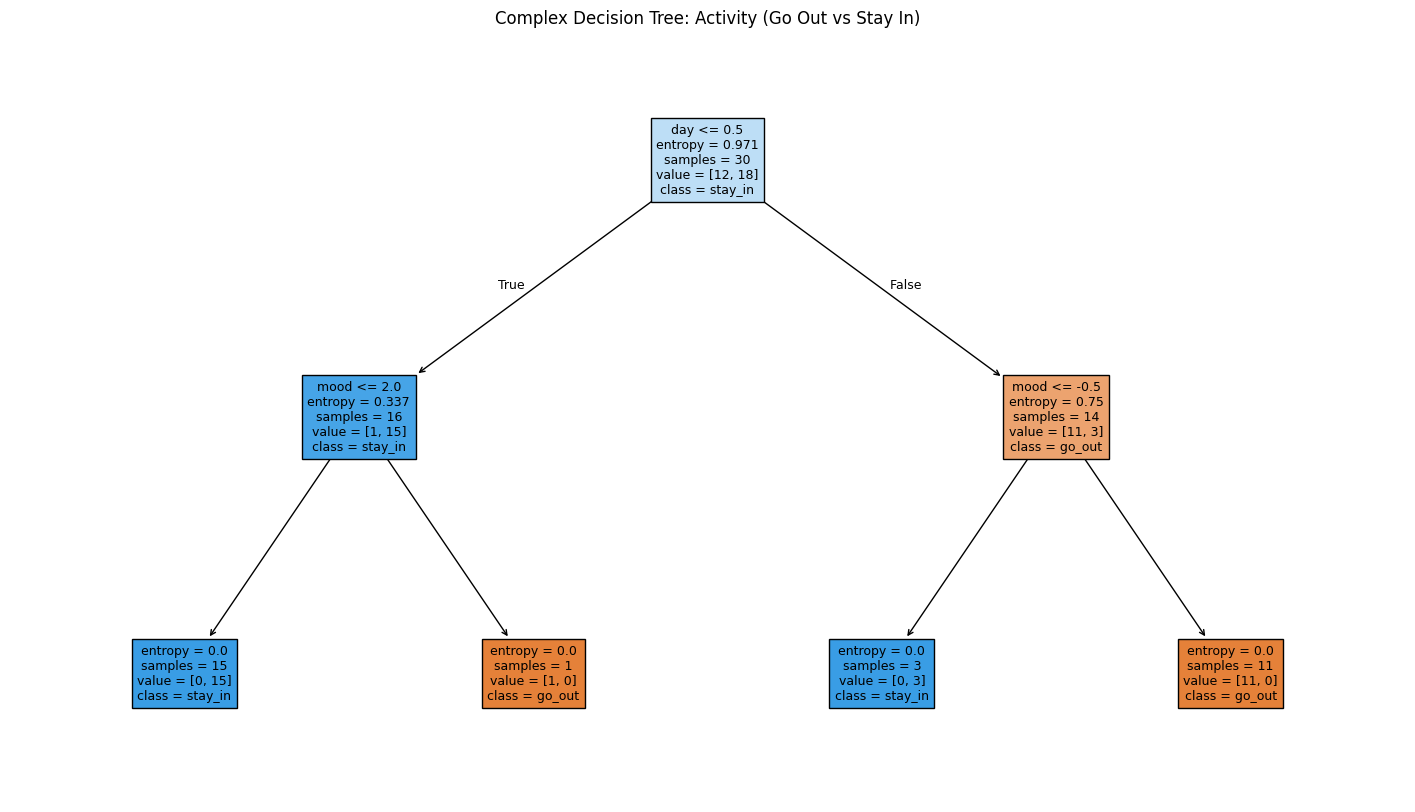

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(99)

n = 30
data_q2 = {
    "weather": np.random.choice(["sunny", "rainy", "cloudy", "stormy"], n),
    "mood": np.random.choice(["happy", "tired", "excited", "sad", "neutral"], n),
    "day": np.random.choice(["weekday", "weekend"], n),
    "temperature": np.random.randint(10, 40, n),   # Celsius
    "friends_free": np.random.choice([0, 1], n)   # 1 = friends available, 0 = not
}

data_q2["activity"] = [
    "go_out" if (w in ["sunny", "cloudy"] and m in ["happy", "excited"] and f == 1 and temp > 15) or (d == "weekend" and m != "sad")
    else "stay_in"
    for w, m, d, temp, f in zip(data_q2["weather"], data_q2["mood"], data_q2["day"], data_q2["temperature"], data_q2["friends_free"])
]

df_q2 = pd.DataFrame(data_q2)

df_q2["weather_encoded"] = df_q2["weather"].map({"sunny":3, "cloudy":2, "rainy":1, "stormy":0})
df_q2["mood_encoded"] = df_q2["mood"].map({"happy":3, "excited":2, "neutral":1, "tired":0, "sad":-1})
df_q2["day_encoded"] = df_q2["day"].map({"weekday":0, "weekend":1})

X_q2 = df_q2[["weather_encoded", "mood_encoded", "day_encoded", "temperature", "friends_free"]]
y_q2 = df_q2["activity"]

clf_q2 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf_q2.fit(X_q2, y_q2)

plt.figure(figsize=(18,10))
plot_tree(clf_q2, feature_names=["weather", "mood", "day", "temperature", "friends_free"],
          class_names=clf_q2.classes_, filled=True, fontsize=9)
plt.title("Complex Decision Tree: Activity (Go Out vs Stay In)")
plt.show()